# Visualizing the Telco Churn Dataset and picking up the important features

In this blog we are going to solve some questions which are listed below.<br>
Ques 1) How to visualize the dataset?<br>
Ques 2) How to select important features?<br>
Ques 3) How to fit different model using sk-learn?<br>
Ques 4) How to upsample and downsample the dataset<br>
Before starting to deep dive into the bog we firstly discuss, what is Churn dataset? Simply Churn dataset is the dataset which contains the data about different people and this tye of dataset are imbalanced means having 90% of one category nad 10% of rest category. This dataset is of the telecom company and the people who are going to use the services of the company and who left basics on the services they purchased


### Important Libraries to important


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Link to dataset is: https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
data= pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#####  Info of our dataset is mention below that the columns are of which data type

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 

In [5]:
print ("Number of rows in the dataset  : " ,data.shape[0])
print ("Number of Columns in the dataset : " ,data.shape[1])
print ("Number of Features : \n" ,data.columns.tolist())
print ("Missing values :  ", data.isnull().sum().values.sum())
print ("Unique values :  \n",data.nunique())

Number of rows in the dataset  :  7043
Number of Columns in the dataset :  21
Number of Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Missing values :   0
Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int

####  So we clearly say that there are missing values in each column. Removing the missing value from the Total Charges, NaN values are present there in the dataset by replacing the value using the regression.

In [10]:


data['TotalCharges']=data["TotalCharges"].replace(r'\s+',np.nan,regex=True)
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

#### Lets start visualizing the dataset using the Matplotlib library and visualizing each columns of the dataset and see how much our dataset is divided into two categories


In [14]:
data.Partner.value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

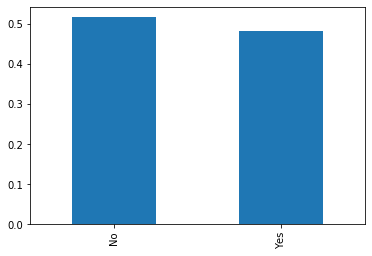

In [8]:
data.Partner.value_counts(normalize=True).plot(kind='bar')

####  The % of both are same so they have equally affecting the final pediction that customer wil carry on or left the service.

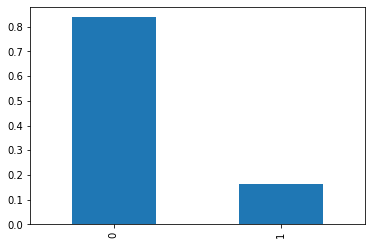

In [9]:
data.SeniorCitizen.value_counts(normalize=True).plot(kind='bar')

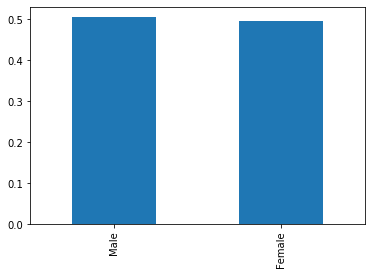

In [10]:
data.gender.value_counts(normalize=True).plot(kind='bar')

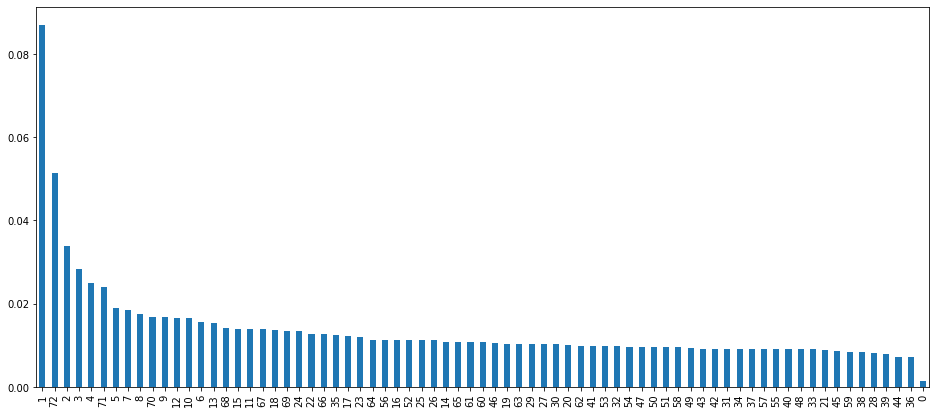

In [11]:
data.tenure.value_counts(normalize=True).plot(kind='bar',figsize=(16,7))

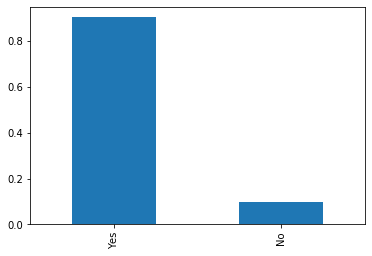

In [12]:
data.PhoneService.value_counts(normalize=True).plot(kind='bar')

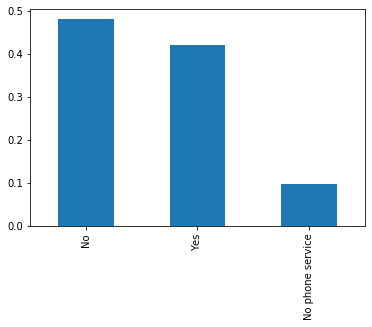

In [13]:
data.MultipleLines.value_counts(normalize=True).plot(kind='bar')

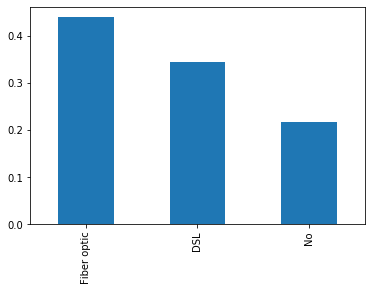

In [14]:
data.InternetService.value_counts(normalize=True).plot(kind='bar')

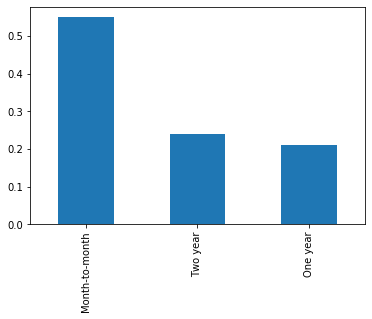

In [15]:
data.Contract.value_counts(normalize=True).plot(kind='bar')

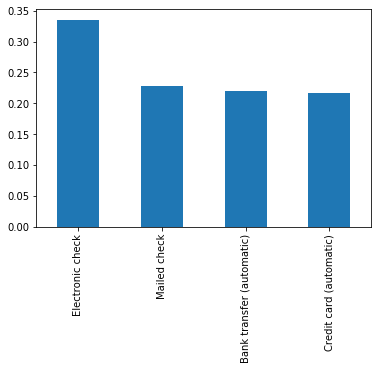

In [16]:
data.PaymentMethod.value_counts(normalize=True).plot(kind='bar')

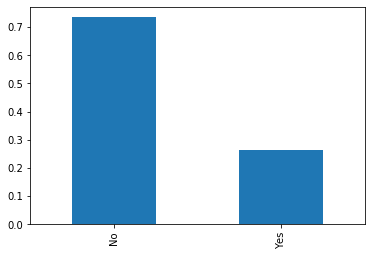

In [17]:
data.Churn.value_counts(normalize=True).plot(kind='bar')

####  Here we look how the two cloumns are co-related to each other.

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


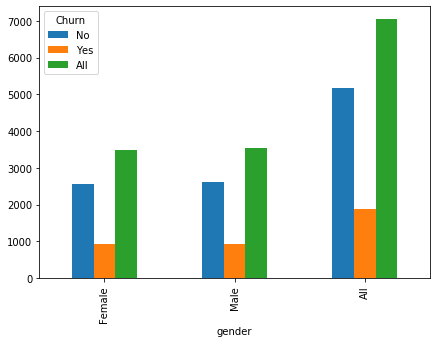

In [15]:
print(pd.crosstab(data.gender,data.Churn,margins=True))
pd.crosstab(data.gender,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

In [16]:
print('Percent of females that left the company {0}'.format((939/1869)*100))
print('Percent of males that left the company {0}'.format((930/1869)*100))

Percent of females that left the company 50.24077046548957
Percent of males that left the company 49.75922953451043


Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


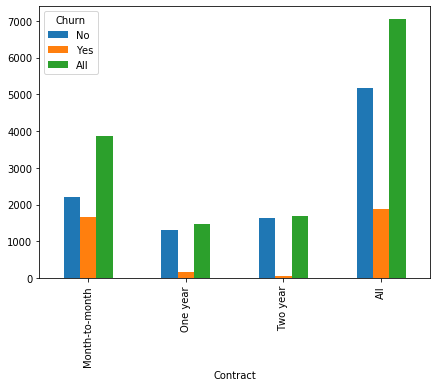

In [17]:
print(pd.crosstab(data.Contract,data.Churn,margins=True))
pd.crosstab(data.Contract,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

In [18]:
print("% off month to month ",((1655/1869)*100))
print("% off one year ",((166/1869)*100))
print("% off two year ",((48/1869)*100))

% off month to month  88.55002675227395
% off one year  8.881754949170679
% off two year  2.568218298555377


Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


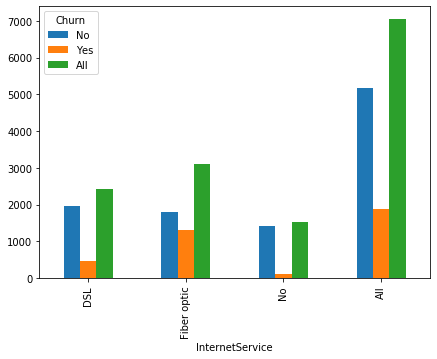

In [31]:
print(pd.crosstab(data.InternetService,data.Churn,margins=True))
pd.crosstab(data.InternetService,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

In [32]:
print("% of DSL service",((459/1869)*100))
print("% of fibre optic",((1297/1869)*100))
print("% of No internet",((113/1869)*100))

% of DSL service 24.558587479935795
% of fibre optic 69.39539860888175
% of No internet 6.046013911182451


Churn    No   Yes   All
row_0                  
29.0   5174  1869  7043
All    5174  1869  7043


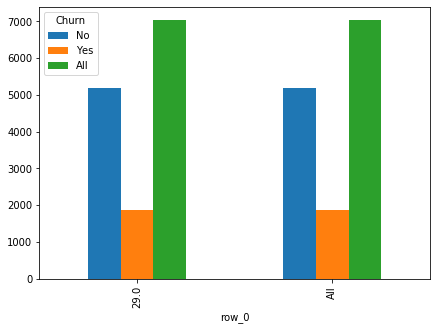

In [33]:
print(pd.crosstab(data.tenure.median(),data.Churn,margins=True))
pd.crosstab(data.tenure.median(),data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043


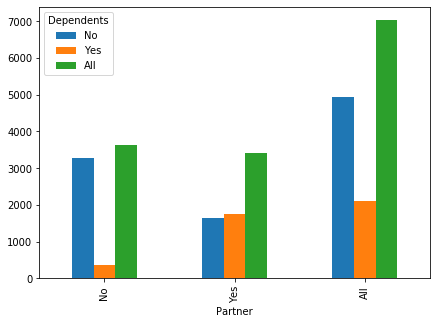

In [34]:
print(pd.crosstab(data.Partner,data.Dependents,margins=True))
pd.crosstab(data.Partner,data.Dependents,margins=True).plot(kind='bar',figsize=(7,5))

In [35]:
print("% of partner that had dependents",((1749/2110)*100))
print("% of non-partner that had dependents",((361/2110)*100))

% of partner that had dependents 82.8909952606635
% of non-partner that had dependents 17.10900473933649


Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


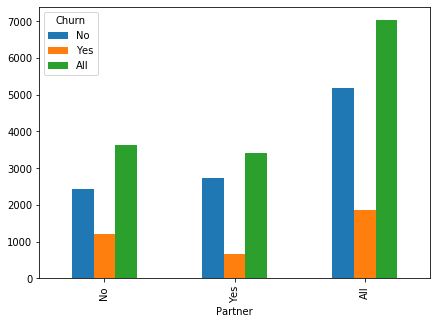

In [36]:
print(pd.crosstab(data.Partner,data.Churn,margins=True))
pd.crosstab(data.Partner,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

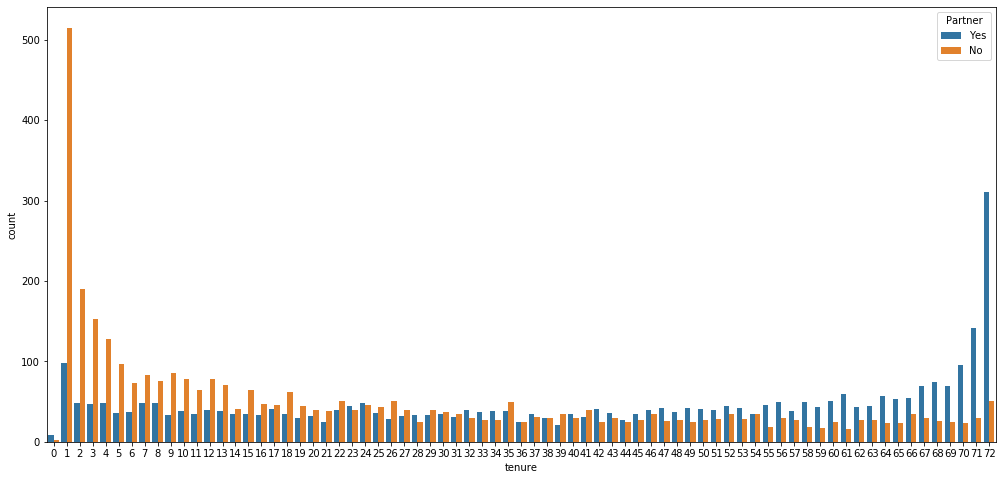

In [37]:
plt.figure(figsize=(17,8))
sns.countplot(x=data['tenure'],hue=data.Partner)

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


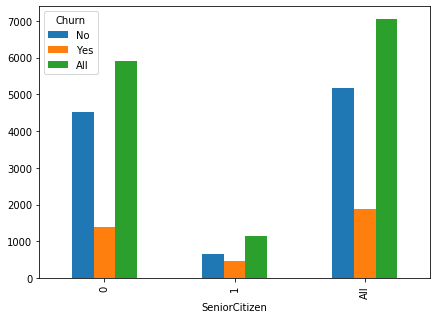

In [38]:
print(pd.crosstab(data.SeniorCitizen,data.Churn,margins=True))
pd.crosstab(data.SeniorCitizen,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

####  The describtion of the dataset is shown below

In [39]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Now using the heat map lets visualize that how does the numerical value containing values are correlated to each other.

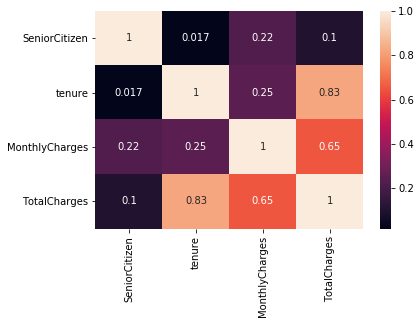

In [40]:
sns.heatmap(data.corr(),xticklabels=data.corr().columns.values,yticklabels=data.corr().columns.values,annot=True)

In [41]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### As you can see above that there some missing values there so filling those values

In [42]:
fill=data.MonthlyCharges*data.tenure

In [43]:
data.TotalCharges.fillna(fill,inplace=True)

In [44]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
data.loc[(data.Churn=='Yes'),'MonthlyCharges'].median()

79.65

In [46]:
data.loc[(data.Churn=='Yes'),'TotalCharges'].median()

703.55

In [47]:
data.loc[(data.Churn=='Yes'),'tenure'].median()

10.0

In [48]:
data.loc[(data.Churn=='Yes'),'PaymentMethod'].value_counts(normalize=True)

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64

####  Now the changing the datatype of the columns from object to numerical datat type. And also doing the one hot encoding and label encoding to the columns of the data set which contains the categorical data.

In [49]:
df=data

In [50]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df)

df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,False,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,False,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,False,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [52]:

print("Payment methods: ",df.PaymentMethod.unique())
print("Contract types: ",df.Contract.unique())
print("Gender: ",df.gender.unique())
print("Senior Citizen: ",df.SeniorCitizen.unique())
print("Internet Service Types: ",df.InternetService.unique())

Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract types:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


In [53]:

df['gender']=df['gender'].astype('category')
df['PaymentMethod']=df['PaymentMethod'].astype('category')
df['Contract']=df['Contract'].astype('category')
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
df['InternetService']=df['InternetService'].astype('category')
df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [54]:
dfPaymentDummies = pd.get_dummies(df['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(df['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(df['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(df['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(df['InternetService'], prefix = 'IS')

print(dfPaymentDummies.head(3))
print(dfContractDummies.head(3))
print(dfGenderDummies.head(3))
print(dfSeniorCitizenDummies.head(3))
print(dfInternetServiceDummies.head(3))

   payment_Bank transfer (automatic)  payment_Credit card (automatic)  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   

   payment_Electronic check  payment_Mailed check  
0                         1                     0  
1                         0                     1  
2                         0                     1  
   contract_Month-to-month  contract_One year  contract_Two year
0                        1                  0                  0
1                        0                  1                  0
2                        1                  0                  0
   gender_Female  gender_Male
0              1            0
1              0            1
2              0            1
   SC_False  SC_True
0         1        0
1         1        0
2         1        0
   IS_DSL  IS_Fiber optic  IS_No
0 

In [55]:

df.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

df = pd.concat([df, dfPaymentDummies], axis=1)
df = pd.concat([df, dfContractDummies], axis=1)
df = pd.concat([df, dfGenderDummies], axis=1)
df = pd.concat([df, dfSeniorCitizenDummies], axis=1)
df = pd.concat([df, dfInternetServiceDummies], axis=1)
df.head(2)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0


In [56]:

df.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']

In [57]:

numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in numericColumns:
    df[columnName]=pd.to_numeric(df[columnName],errors='coerce')
df.dtypes

customerID                     object
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True     

#### Finally after dropping the non- essential columns and doing one hot encoding and label encoding. Our final dataset is :

In [116]:
df.head()

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
2,3668-QPYBK,0,0,2,1,0,1,1,0,0,...,1,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
4,9237-HQITU,0,0,2,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
df.Churn.value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

In [61]:
# Separate majority and minority classes
df_majority = df[df.Churn==0]
df_minority = df[df.Churn==1]

In [62]:
from sklearn.utils import resample

In [63]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5174,    # to match majority class
                                 random_state=123) 

### Umsampling on the dataset is done for increasing the size of the minority class in the dataset

In [64]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [65]:
df_upsampled

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
3,7795-CFOCW,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
6,1452-KIOVK,0,1,22,1,1,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
7,6713-OKOMC,0,0,10,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,3190-XFANI,0,1,49,1,1,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0
3301,2636-ALXXZ,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3621,2933-FILNV,1,1,2,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
6600,4592-IWTJI,1,1,3,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [66]:
df_up=df_upsampled.sample(frac=1)

In [67]:
df_up

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
499,7783-YKGDV,0,0,12,1,1,1,1,1,0,...,1,0,0,1,0,1,0,0,1,0
492,0388-EOPEX,1,0,2,1,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2743,2323-ARSVR,1,0,67,1,0,1,1,1,1,...,0,0,1,0,1,1,0,0,1,0
2949,3489-VSFRD,0,0,56,1,0,1,0,1,1,...,0,1,0,1,0,1,0,1,0,0
1677,3283-WCWXT,1,1,6,1,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2800-VEQXM,0,0,3,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
4524,3934-HXCFZ,1,0,23,1,1,1,1,1,0,...,1,0,0,0,1,1,0,0,1,0
6291,2890-WFBHU,0,0,59,1,1,1,1,1,1,...,0,1,0,1,0,1,0,1,0,0
6830,7815-PDTHL,0,0,35,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1


### Downsampling on the dataset is done for decreasing the size of the majority class in the dataset

In [68]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1869,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [69]:
df_down=df_downsampled.sample(frac=1)

In [70]:
df_down

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
3759,7479-NITWS,0,0,7,1,1,0,0,1,0,...,1,0,0,0,1,1,0,0,1,0
6877,4501-EQDRN,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
521,4109-CYRBD,1,0,29,1,1,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
5090,6502-HCJTI,1,0,7,1,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
408,4800-VHZKI,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723,2068-WWXQZ,0,0,46,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
6574,6969-MVBAI,0,0,9,1,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
6202,8559-CIZFV,1,1,21,1,1,1,1,0,1,...,0,1,0,0,1,1,0,1,0,0
5783,1415-YFWLT,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [117]:
# Dividing the dataset into two part one having onlty the target value and other having all other columns
X_up = df_up.drop('Churn', axis=1)
Y_up = df_up['Churn']

In [72]:
# spliting the dataset into traing and tesing data
x_train_up, x_test_up, y_train_up, y_test_up = train_test_split(X_up, Y_up, test_size=0.2)

In [73]:
x_train_up.shape, x_test_up.shape

((8278, 29), (2070, 29))

In [74]:
y_train_up.shape, y_test_up.shape

((8278,), (2070,))

In [75]:
x_train_up

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
3852,7291-CDTMJ,0,0,1,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
4010,3727-JEZTU,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4324,6873-UDNLD,0,0,40,1,0,1,0,1,0,...,1,0,0,0,1,1,0,1,0,0
1970,5445-UTODQ,1,0,7,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
5368,6168-WFVVF,0,0,3,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4314,4597-NUCQV,0,0,24,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
6376,1302-TPUBN,0,0,66,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
2921,0564-JJHGS,0,0,9,1,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
5869,3410-MHHUM,1,1,44,1,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0


In [76]:
x_down = df_down.drop('Churn', axis=1)
y_down = df_down['Churn']

#### We will work on the upsampled dataset

In [77]:
x_train_down, x_test_down, y_train_down, y_test_down = train_test_split(x_down, y_down, test_size=0.2)

In [78]:
x_train_down.shape, x_test_down.shape

((2990, 29), (748, 29))

In [79]:
y_train_down.shape, y_test_down.shape

((2990,), (748,))

#### We have to drop the customer id because it's an object data type and we have to fit data on numerical type only.

In [80]:
x_train=x_train_up.drop('customerID', axis=1)
x_test=x_test_up.drop('customerID', axis=1)

### Starting with the Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train_up)

In [82]:
y_pred = logistic_model.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [85]:
pred_results = pd.DataFrame({'y_test': y_test_up,
                             'y_pred': y_pred})

In [86]:
pred_results.head()

,y_test,y_pred
6625,1,1
4,1,1
295,0,0
3955,0,1
1772,1,1


In [87]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

titanic_crosstab

y_test,0,1
y_pred,,
0,772,228
1,249,821


In [88]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [89]:
acc = accuracy_score(y_test_up, y_pred)
prec = precision_score(y_test_up, y_pred)
recall = recall_score(y_test_up, y_pred)
f1 = f1_score(y_test_up, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

accuracy_score :  0.7695652173913043
precision_score :  0.7672897196261682
recall_score :  0.782650142993327
f1_score :  0.7748938178386032


In [90]:
cf_matrix=confusion_matrix(y_pred, y_test_up)
cf_matrix

array([[772, 228],
       [249, 821]], dtype=int64)

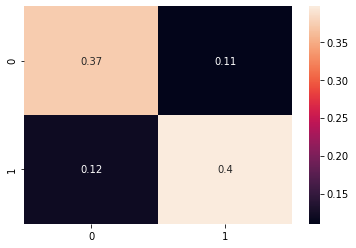

In [91]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True)

In [92]:
from sklearn.metrics import classification_report

In [93]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test_up, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.77      0.76      0.76      1021
     class 1       0.77      0.78      0.77      1049

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



###  Now using the Decision Tree we again make the classification and taking classification criteria gini nad entropy

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
sk_tree_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [96]:
sk_tree_gini.fit(x_train, y_train_up)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
y_pred_gini=sk_tree_gini.predict(x_test)

In [98]:
pred_results_gini= pd.DataFrame({'y_test': y_test_up,
                             'y_pred': y_pred_gini})

In [99]:
titanic_crosstab_gini = pd.crosstab(pred_results_gini.y_pred, pred_results_gini.y_test)

titanic_crosstab_gini

y_test,0,1
y_pred,,
0,785,204
1,236,845


In [100]:
acc_gini = accuracy_score(y_test_up, y_pred_gini)
prec_gini = precision_score(y_test_up, y_pred_gini)
recall_gini = recall_score(y_test_up, y_pred_gini)
f1_gini = f1_score(y_test_up, y_pred_gini)
print("accuracy_score : ", acc_gini)
print("precision_score : ", prec_gini)
print("recall_score : ", recall_gini)
print("f1_score : ", f1_gini)

accuracy_score :  0.7874396135265701
precision_score :  0.7816836262719704
recall_score :  0.8055290753098189
f1_score :  0.7934272300469485


In [101]:
target_names = ['class 0', 'class 1']
print("using decision tree gini")
print(classification_report(y_test_up, y_pred_gini, target_names=target_names))

using decision tree gini
              precision    recall  f1-score   support

     class 0       0.79      0.77      0.78      1021
     class 1       0.78      0.81      0.79      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



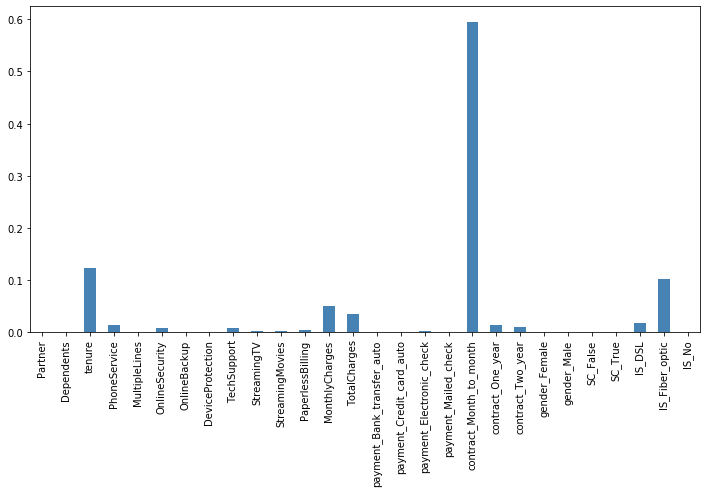

In [102]:
pd.Series(sk_tree_gini.feature_importances_, index=x_train.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [103]:
sk_tree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [104]:
sk_tree_entropy.fit(x_train[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']], y_train_up)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
y_pred_entropy=sk_tree_entropy.predict(x_test[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']])

In [106]:
pred_results_entropy= pd.DataFrame({'y_test': y_test_up,
                             'y_pred': y_pred_entropy})

In [107]:
titanic_crosstab_entropy = pd.crosstab(pred_results_entropy.y_pred, pred_results_entropy.y_test)

titanic_crosstab_entropy

y_test,0,1
y_pred,,
0,704,138
1,317,911


In [108]:
acc_entropy = accuracy_score(y_test_up, y_pred_entropy)
prec_entropy= precision_score(y_test_up, y_pred_entropy)
recall_entropy= recall_score(y_test_up, y_pred_entropy)
f1_entropy = f1_score(y_test_up, y_pred_entropy)
print("accuracy_score : ", acc_entropy)
print("precision_score : ", prec_entropy)
print("recall_score : ", recall_entropy)
print("f1_score : ", f1_entropy)

accuracy_score :  0.7801932367149759
precision_score :  0.74185667752443
recall_score :  0.8684461391801716
f1_score :  0.800175669740887


In [109]:

target_names = ['class 0', 'class 1']
print("using decision tree entropy")
print(classification_report(y_test_up, y_pred_entropy, target_names=target_names))

using decision tree entropy
              precision    recall  f1-score   support

     class 0       0.84      0.69      0.76      1021
     class 1       0.74      0.87      0.80      1049

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



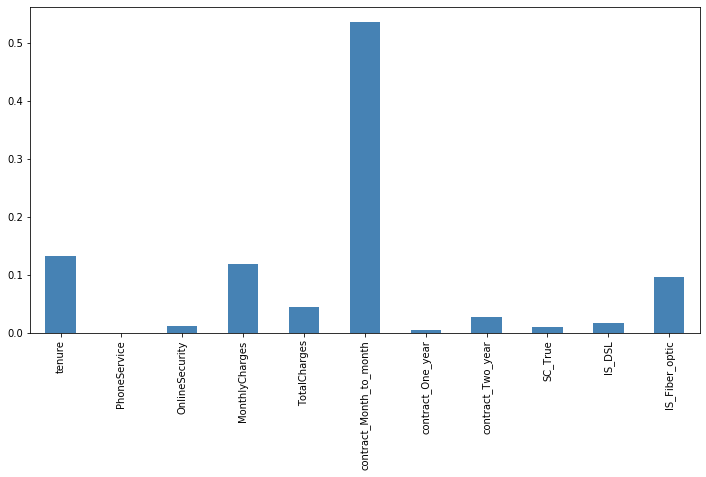

In [110]:
pd.Series(sk_tree_entropy.feature_importances_, index=x_train[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']].columns).plot.bar(color='steelblue', figsize=(12, 6))

### Now the according to the graph shown above we can see that which features are important so taking that features only training Random forest Classifier

In [112]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']],y_train_up)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
y_pred_rf=model.predict(x_test[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']])

In [114]:
pred_results_rf= pd.DataFrame({'y_test': y_test_up,
                             'y_pred': y_pred_entropy})

In [115]:
crosstab_rf = pd.crosstab(pred_results_rf.y_pred, pred_results_rf.y_test)

crosstab_rf

y_test,0,1
y_pred,,
0,704,138
1,317,911
